<a href="https://colab.research.google.com/github/JSRV18/Dinosaurio-repository/blob/main/MinimosCuadradosDinosaurio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
MinimosCuadratico.txt  MinimosLineal.txt


<function matplotlib.pyplot.show(close=None, block=None)>

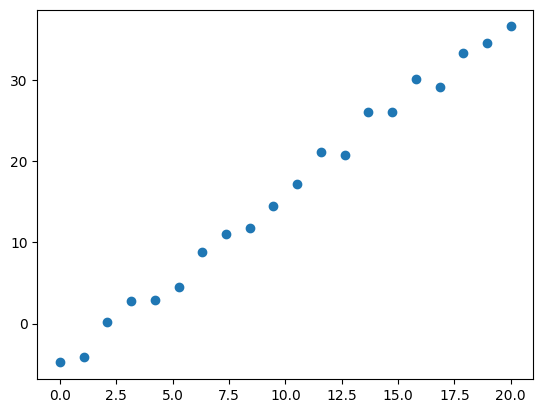

In [26]:
# Punto 2 (Mínimos cuadrados)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


os.chdir("/content/drive/MyDrive/Archivos de Métodos")
!ls


file = '/content/drive/MyDrive/Archivos de Métodos/MinimosLineal.txt'
file


data = pd.read_csv(file, sep=" ", header=None)
data.columns = ['x','y']
x = np.array(data['x'])
y = np.array(data['y'])

plt.scatter(x,y)
plt.show

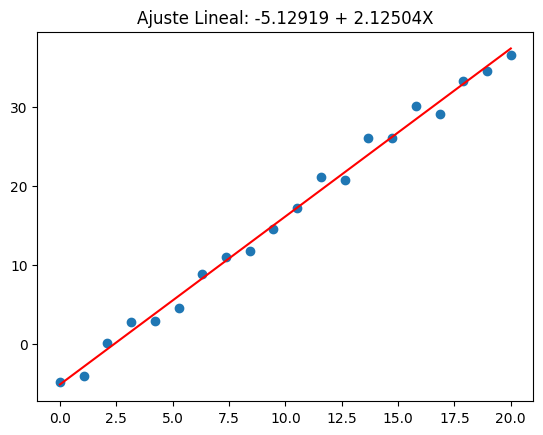

In [42]:
def GetFit(x,y,n):

  l = x.shape[0]
  b = y

  A = np.ones((l,n+1))

  for i in range(1,n+1):
    A[:,i] = x**i

  # Ajuste
  AT = np.dot(A.T,A)
  bT = np.dot(A.T,b)

  xsol = np.linalg.solve(AT,bT)

  return xsol


def GetModel(x,p):

  y = 0.
  for n in range(len(p)):
    y += p[n]*x**n

  return y

n=1
xsol = GetFit(x,y,n=n)
_x = np.linspace(np.min(x),np.max(x),50)
_y = GetModel(_x,xsol)


plt.scatter(x,y)
plt.plot(_x,_y,color='r')
plt.title("Ajuste Lineal: " + str(round(xsol[0],5)) + " + " + str(round(xsol[1],5))+"X")
plt.show()

In [3]:
import sympy as sym
X = sym.Symbol('x')
GetModel(X,xsol)

2.12503680800827*x - 5.12918552885297

<function matplotlib.pyplot.show(close=None, block=None)>

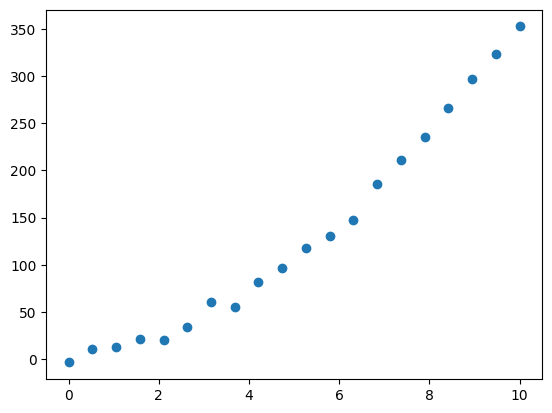

In [4]:
# Punto 3

file2 = '/content/drive/MyDrive/Archivos de Métodos/MinimosCuadratico.txt'
file2


data = pd.read_csv(file2, sep=" ", header=None)
data.columns = ['x','y']
x2 = np.array(data['x'])
y2 = np.array(data['y'])

plt.scatter(x2,y2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

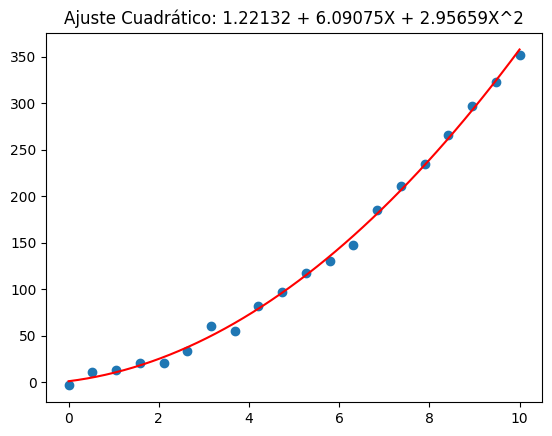

In [41]:
n=2
xsol2 = GetFit(x2,y2,n=n)
_x2 = np.linspace(np.min(x2),np.max(x2),50)
_y2 = GetModel(_x2,xsol2)


plt.scatter(x2,y2)
plt.plot(_x2,_y2,color='r')
plt.title("Ajuste Cuadrático: " + str(round(xsol2[0],5)) + " + " + str(round(xsol2[1],5)) + "X + " + str(round(xsol2[2],5)) + "X^2")

plt.show

In [6]:
import sympy as sym
X = sym.Symbol('x')
GetModel(X,xsol2)

2.95658740177386*x**2 + 6.09075204636229*x + 1.22132053617042

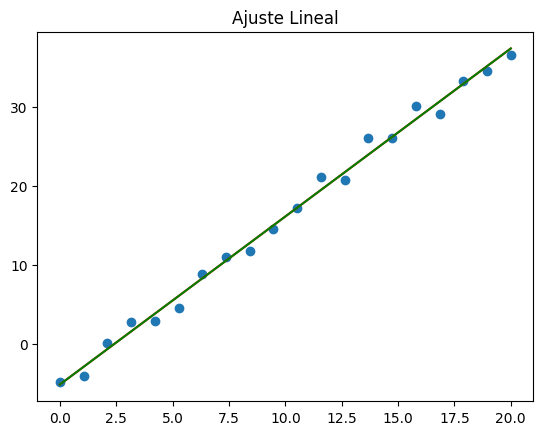

In [7]:
#Punto 4

from scipy.optimize import curve_fit

def f1(m,x,b):
  return b + m*x

popt = curve_fit(f1,x,y)
plt.scatter(x,y)
plt.plot(_x,_y,color='r')
plt.title("Ajuste Lineal")
_xc = np.linspace(np.min(x),np.max(x),50)
plt.plot(_x,f1(_xc,*popt[0]),color='g')

In [8]:
# Comparación
popt[0],xsol

(array([ 2.12503681, -5.12918554]), array([-5.12918553,  2.12503681]))

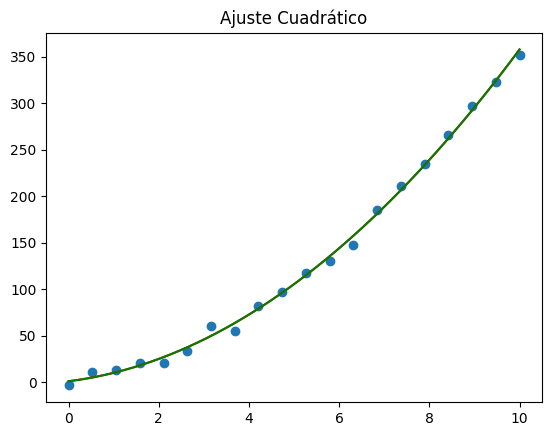

In [9]:
def f2(x,c,b,a):
  return c + b*x + a*x**2

popt2 = curve_fit(f2,x2,y2)
plt.scatter(x2,y2)
plt.plot(_x2,_y2,color='r')
plt.title("Ajuste Cuadrático")
_xc2 = np.linspace(np.min(x2),np.max(x2),50)
plt.plot(_x2,f2(_xc2,*popt2[0]),color='g')

In [10]:
#Comparación
popt2[0],xsol2

(array([1.22131863, 6.09075287, 2.95658733]),
 array([1.22132054, 6.09075205, 2.9565874 ]))